<a href="https://colab.research.google.com/github/krish-hayagriva/Machine-Learning-Projects/blob/main/21CSA519A_Case_study5_krishnan_2107470.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This  sheet contains program code for Logistic Regression used for classification of rice data into binary class Gonen and Jasmine 

Importing Libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
pip install -U scikit-learn

Importing and reading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

ricedata = pd.read_csv("/content/drive/My Drive/rice.csv")


Reading the rice dataframe

In [ ]:
ricedata


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.23,64.01,0.72,4677,76.00,0.66,273.09,0.76,1.44,jasmine
1,2,2872,74.69,51.40,0.73,3015,60.47,0.71,208.32,0.83,1.45,jasmine
2,3,3048,76.29,52.04,0.73,3132,62.30,0.76,210.01,0.87,1.47,jasmine
3,4,3073,77.03,51.93,0.74,3157,62.55,0.78,210.66,0.87,1.48,jasmine
4,5,3693,85.12,56.37,0.75,3802,68.57,0.77,230.33,0.87,1.51,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.62,51.03,0.94,6008,86.33,0.50,332.96,0.66,2.91,Gonen
18181,18182,7585,169.59,58.14,0.94,7806,98.27,0.65,385.51,0.64,2.92,Gonen
18182,18183,6365,154.78,52.91,0.94,6531,90.02,0.56,342.25,0.68,2.93,Gonen
18183,18184,5960,151.40,51.47,0.94,6189,87.11,0.49,343.37,0.64,2.94,Gonen


In [ ]:
ricedata.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [ ]:
ricedata = ricedata[["Area","MajorAxisLength","MinorAxisLength","Eccentricity","ConvexArea","EquivDiameter","Extent","Perimeter","Roundness","AspectRation","Class" ]]

In [ ]:
ricedata = ricedata.rename(columns={'Area': 'area', 'MajorAxisLength': 'maxis', 'MinorAxisLength':'minaxis','Eccentricity':'ecc','ConvexArea':'cvarea','EquivDiameter':'ediam','Extent':'extnt','Perimeter':'pmeter','AspectRation':'aspectr','Class':'ricetyp'})


In [ ]:
ricedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       18185 non-null  int64  
 1   maxis      18185 non-null  float64
 2   minaxis    18185 non-null  float64
 3   ecc        18185 non-null  float64
 4   cvarea     18185 non-null  int64  
 5   ediam      18185 non-null  float64
 6   extnt      18185 non-null  float64
 7   pmeter     18185 non-null  float64
 8   Roundness  18185 non-null  float64
 9   aspectr    18185 non-null  float64
 10  ricetyp    18185 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
ricedata.describe()

,area,maxis,minaxis,ecc,cvarea,ediam,extnt,pmeter,Roundness,aspectr
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680764,59.807854,0.915399,7225.817872,94.132967,0.616651,351.607424,0.707996,2.599092
std,1467.197150,12.376392,10.061659,0.030720,1502.006571,9.906275,0.104400,29.500635,0.067363,0.434875
min,2522.000000,74.130000,34.410000,0.680000,2579.000000,56.670000,0.380000,197.020000,0.170000,1.360000
25%,5962.000000,145.680000,51.390000,0.890000,6125.000000,87.130000,0.540000,333.990000,0.650000,2.210000
50%,6660.000000,153.880000,55.720000,0.920000,6843.000000,92.090000,0.600000,353.090000,0.700000,2.600000
75%,8423.000000,160.060000,70.160000,0.940000,8645.000000,103.560000,0.700000,373.000000,0.770000,2.960000
max,10210.000000,183.210000,82.550000,0.970000,11008.000000,114.020000,0.890000,508.510000,0.900000,3.910000


In [ ]:
x = pd.DataFrame(ricedata.iloc[:, 0:9])
y = pd.DataFrame(ricedata.iloc[:,10])
print(x.tail(10))


       area   maxis  minaxis   ecc  cvarea   ediam  extnt  pmeter  Roundness
18175  9101  183.21    65.03  0.93    9431  107.65   0.47  414.05       0.67
18176  7595  166.37    59.05  0.93    7734   98.34   0.48  371.32       0.69
18177  5865  146.17    51.62  0.94    6011   86.41   0.55  326.86       0.69
18178  6165  149.40    52.69  0.94    6295   88.60   0.66  339.23       0.67
18179  5757  146.51    50.65  0.94    5859   85.62   0.48  326.51       0.68
18180  5853  148.62    51.03  0.94    6008   86.33   0.50  332.96       0.66
18181  7585  169.59    58.14  0.94    7806   98.27   0.65  385.51       0.64
18182  6365  154.78    52.91  0.94    6531   90.02   0.56  342.25       0.68
18183  5960  151.40    51.47  0.94    6189   87.11   0.49  343.37       0.64
18184  6134  153.08    51.59  0.94    6283   88.37   0.49  338.61       0.67


Before we begin any analzis , we standardize the data across all variables. This is necessary as we see that data is very skewed between features acmong the two classes Jasmine and Gonen rice types.

In [ ]:
type(x)
type(y)

pandas.core.frame.DataFrame

In [ ]:
ctendency = ricedata.groupby(['ricetyp']).mean()
ricedata['ricetyp'].value_counts()

jasmine    9985
Gonen      8200
Name: ricetyp, dtype: int64

One hot encoding of rice type column can be done as below. However since we are going to solve the problem of classification using Decision Tree, we need not one hot encode the column ricetype.

coding the rice type column as one hot codes

One hot encoding of rice type column can be done as below. However since we are going to solve the problem of classification using Decision Tree, we need not one hot encode the column ricetype.

In [ ]:
ricedata.head(3)

,area,maxis,minaxis,ecc,cvarea,ediam,extnt,pmeter,Roundness,aspectr,ricetyp
0,4537,92.23,64.01,0.72,4677,76.00,0.66,273.09,0.76,1.44,jasmine
1,2872,74.69,51.40,0.73,3015,60.47,0.71,208.32,0.83,1.45,jasmine
2,3048,76.29,52.04,0.73,3132,62.30,0.76,210.01,0.87,1.47,jasmine


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler() # defining the standard scaler
X_scaled = pd.DataFrame(sclr.fit_transform(x),columns =x.columns) # transforming all features into a standardized form
(X_scaled).head(5)

,area,maxis,minaxis,ecc,cvarea,ediam,extnt,pmeter,Roundness
0,-1.703630,-4.803694,0.417651,-6.360715,-1.696989,-1.830503,0.415237,-2.661624,0.772015
1,-2.838478,-6.220947,-0.835656,-6.035191,-2.803539,-3.398239,0.894178,-4.857230,1.811189
2,-2.718519,-6.091665,-0.772046,-6.035191,-2.725641,-3.213503,1.373119,-4.799941,2.405003
3,-2.701479,-6.031872,-0.782979,-5.709666,-2.708996,-3.188265,1.564696,-4.777907,2.405003
4,-2.278893,-5.378191,-0.341688,-5.384142,-2.279559,-2.580553,1.468907,-4.111124,2.405003


In [ ]:
corr_matrix = ricedata.corr()
print(corr_matrix)
type(ricedata)

               area     maxis   minaxis       ecc    cvarea     ediam  \
area       1.000000  0.599936  0.930215 -0.547336  0.999362  0.998158   
maxis      0.599936  1.000000  0.273210  0.294857  0.602058  0.617999   
minaxis    0.930215  0.273210  1.000000 -0.804891  0.928992  0.923791   
ecc       -0.547336  0.294857 -0.804891  1.000000 -0.545176 -0.532027   
cvarea     0.999362  0.602058  0.928992 -0.545176  1.000000  0.997403   
ediam      0.998158  0.617999  0.923791 -0.532027  0.997403  1.000000   
extnt      0.230947 -0.073161  0.308867 -0.328809  0.227771  0.226355   
pmeter     0.881541  0.870176  0.674252 -0.164807  0.886988  0.891567   
Roundness  0.620078 -0.202128  0.833680 -0.898622  0.609832  0.607035   
aspectr   -0.623985  0.240445 -0.860509  0.946209 -0.621476 -0.609964   

              extnt    pmeter  Roundness   aspectr  
area       0.230947  0.881541   0.620078 -0.623985  
maxis     -0.073161  0.870176  -0.202128  0.240445  
minaxis    0.308867  0.674252   0.833

pandas.core.frame.DataFrame

In [ ]:
import seaborn as sns
rice_plot = sns.pairplot(ricedata, hue ='ricetyp')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled , y, random_state=0)
x_train.head(3)

,area,maxis,minaxis,ecc,cvarea,ediam,extnt,pmeter,Roundness
8656,-0.570146,0.658468,-0.924113,1.126349,-0.554485,-0.533310,1.373119,-0.083642,-1.009426
7129,-0.789618,0.187397,-0.931070,0.800824,-0.737579,-0.769530,-1.500528,-0.310084,-1.157880
14175,1.151552,0.462929,1.149161,-0.826798,1.113995,1.138404,-0.255281,0.764838,1.068922


In [ ]:
x_test.head(3)

,area,maxis,minaxis,ecc,cvarea,ediam,extnt,pmeter,Roundness
12333,1.157686,0.309407,1.268429,-1.152323,1.155274,1.143451,1.181543,0.867550,0.920468
10385,1.875401,0.837039,1.840915,-1.152323,1.882322,1.767316,-0.159493,1.623826,0.920468
12105,0.588558,-0.360435,0.913607,-1.152323,0.571373,0.621546,-0.159493,0.151614,1.068922


In [ ]:
x_train.head(3)
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=10, random_state=0,verbose = 1, n_jobs= -1, Cs =8).fit(x_train, y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.4s finished


In [ ]:
train_model = pd.DataFrame(clf.predict(x_train), columns = ['predicted'])
train_model['actual'] = y_train.values
train_model.head(3)

,predicted,actual
0,jasmine,jasmine
1,jasmine,jasmine
2,Gonen,Gonen


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


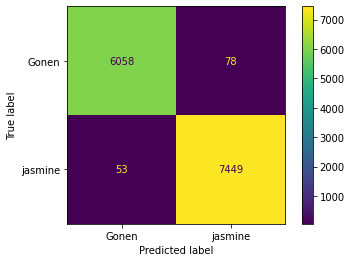

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cf = plot_confusion_matrix(clf,x_train,y_train) 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_model['actual'],train_model['predicted']))

              precision    recall  f1-score   support

       Gonen       0.99      0.99      0.99      6136
     jasmine       0.99      0.99      0.99      7502

    accuracy                           0.99     13638
   macro avg       0.99      0.99      0.99     13638
weighted avg       0.99      0.99      0.99     13638



In [ ]:
test_model = pd.DataFrame(clf.predict(x_test), columns = ['predicted'])
test_model['actual'] = y_test.values
test_model.head(3)

,predicted,actual
0,Gonen,Gonen
1,Gonen,Gonen
2,Gonen,Gonen


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


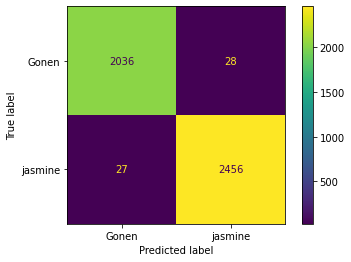

In [ ]:
cf_test = plot_confusion_matrix(clf,x_test,y_test) 

In [ ]:
print(classification_report(test_model['actual'],test_model['predicted']))

              precision    recall  f1-score   support

       Gonen       0.99      0.99      0.99      2064
     jasmine       0.99      0.99      0.99      2483

    accuracy                           0.99      4547
   macro avg       0.99      0.99      0.99      4547
weighted avg       0.99      0.99      0.99      4547



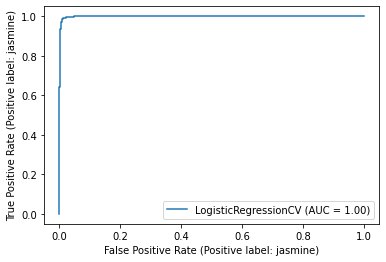

In [ ]:
 from sklearn.metrics import RocCurveDisplay
 RocCurveDisplay.from_estimator(clf, x_test, y_test)